### Áî®PopularityÂÅö OLS Ê®°Âûã

# 1 ËÆÄÂèñË≥áÊñô

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
# ËÆÄÂèñ A1 Ëàá A2 Ë≥áÊñô
high = pd.read_csv("spotify/data/high_popularity_spotify_data.csv")
low = pd.read_csv("spotify/data/low_popularity_spotify_data.csv")


df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')
df.head()

df['playlist_genre'].value_counts()
df['track_artist'].value_counts()


track_artist
Bad Bunny             30
Ren Avel              26
Asake                 21
Bnxn                  19
LoFi Waiter           18
                      ..
RADWIMPS, Toaka        1
ÁµêÊùü„Éê„É≥„Éâ                  1
MAISONdes, Ëä±Ë≠ú, „ÉÑ„Éü„Ç≠     1
SPYAIR                 1
Sudha Ragunathan       1
Name: count, Length: 3390, dtype: int64

# 2 ÂàùÊ≠•ËßÄÂØü

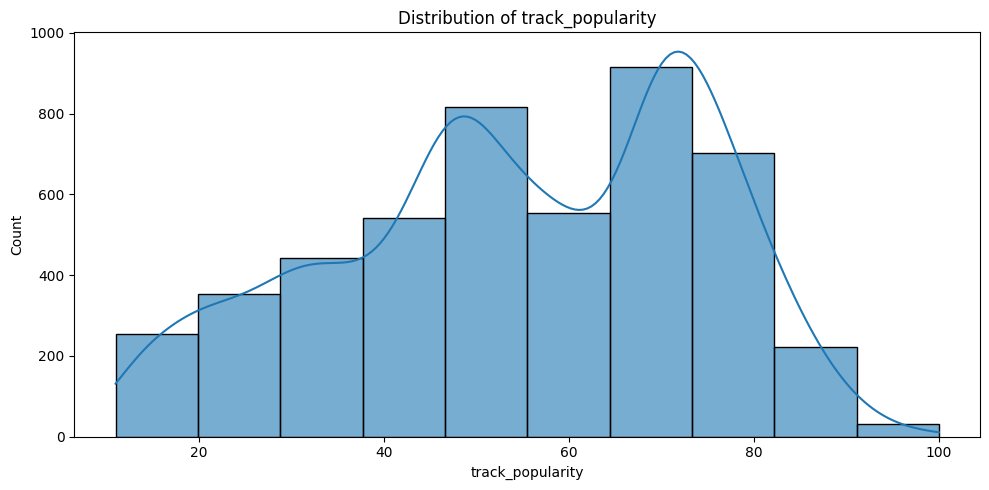

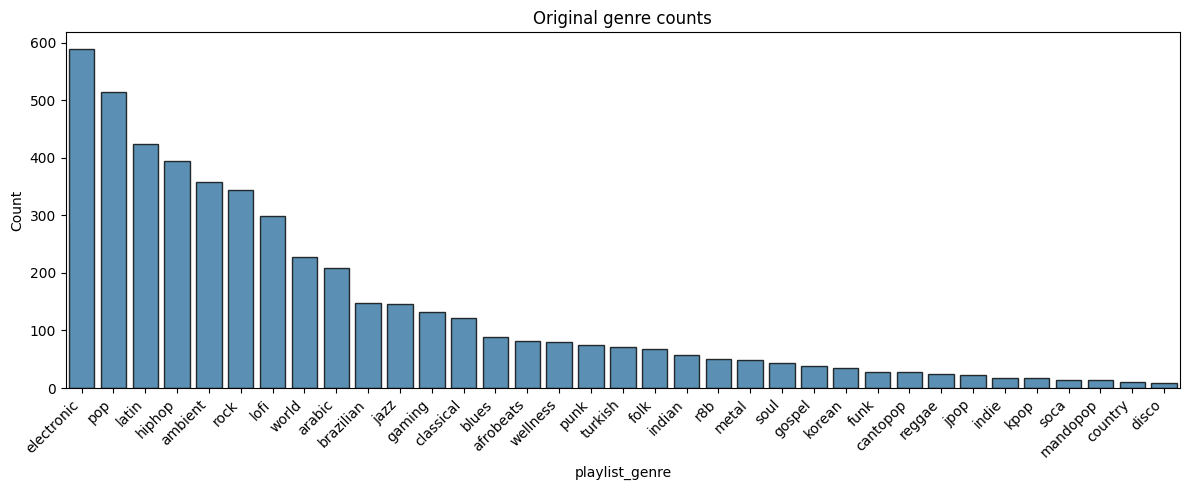

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# ‚îÄ‚îÄ Á¨¨‰∏ÄÊ¨ÑÔºötrack_popularity ÁöÑHistogram + KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x="track_popularity",
    bins=10,          # Âä†Â§ßÁµÑÊï∏
    kde=True,         # Âä†‰∏äÂØÜÂ∫¶Êõ≤Á∑ö
    stat="count",
    edgecolor="black",
    alpha=0.6
)
plt.title("Distribution of track_popularity")
plt.xlabel("track_popularity")
plt.ylabel("Count")
plt.tight_layout()


# ‚îÄ‚îÄ Á¨¨‰∫åÊ¨ÑÔºöÂéüÂßã playlist_genre ÁöÑÊ¨°Êï∏Ê¢ùÂΩ¢Âúñ
genre_counts = df["playlist_genre"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(
    x=genre_counts.index,
    y=genre_counts.values,
    edgecolor="black",
    alpha=0.8
)
plt.title("Original genre counts")
plt.xlabel("playlist_genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


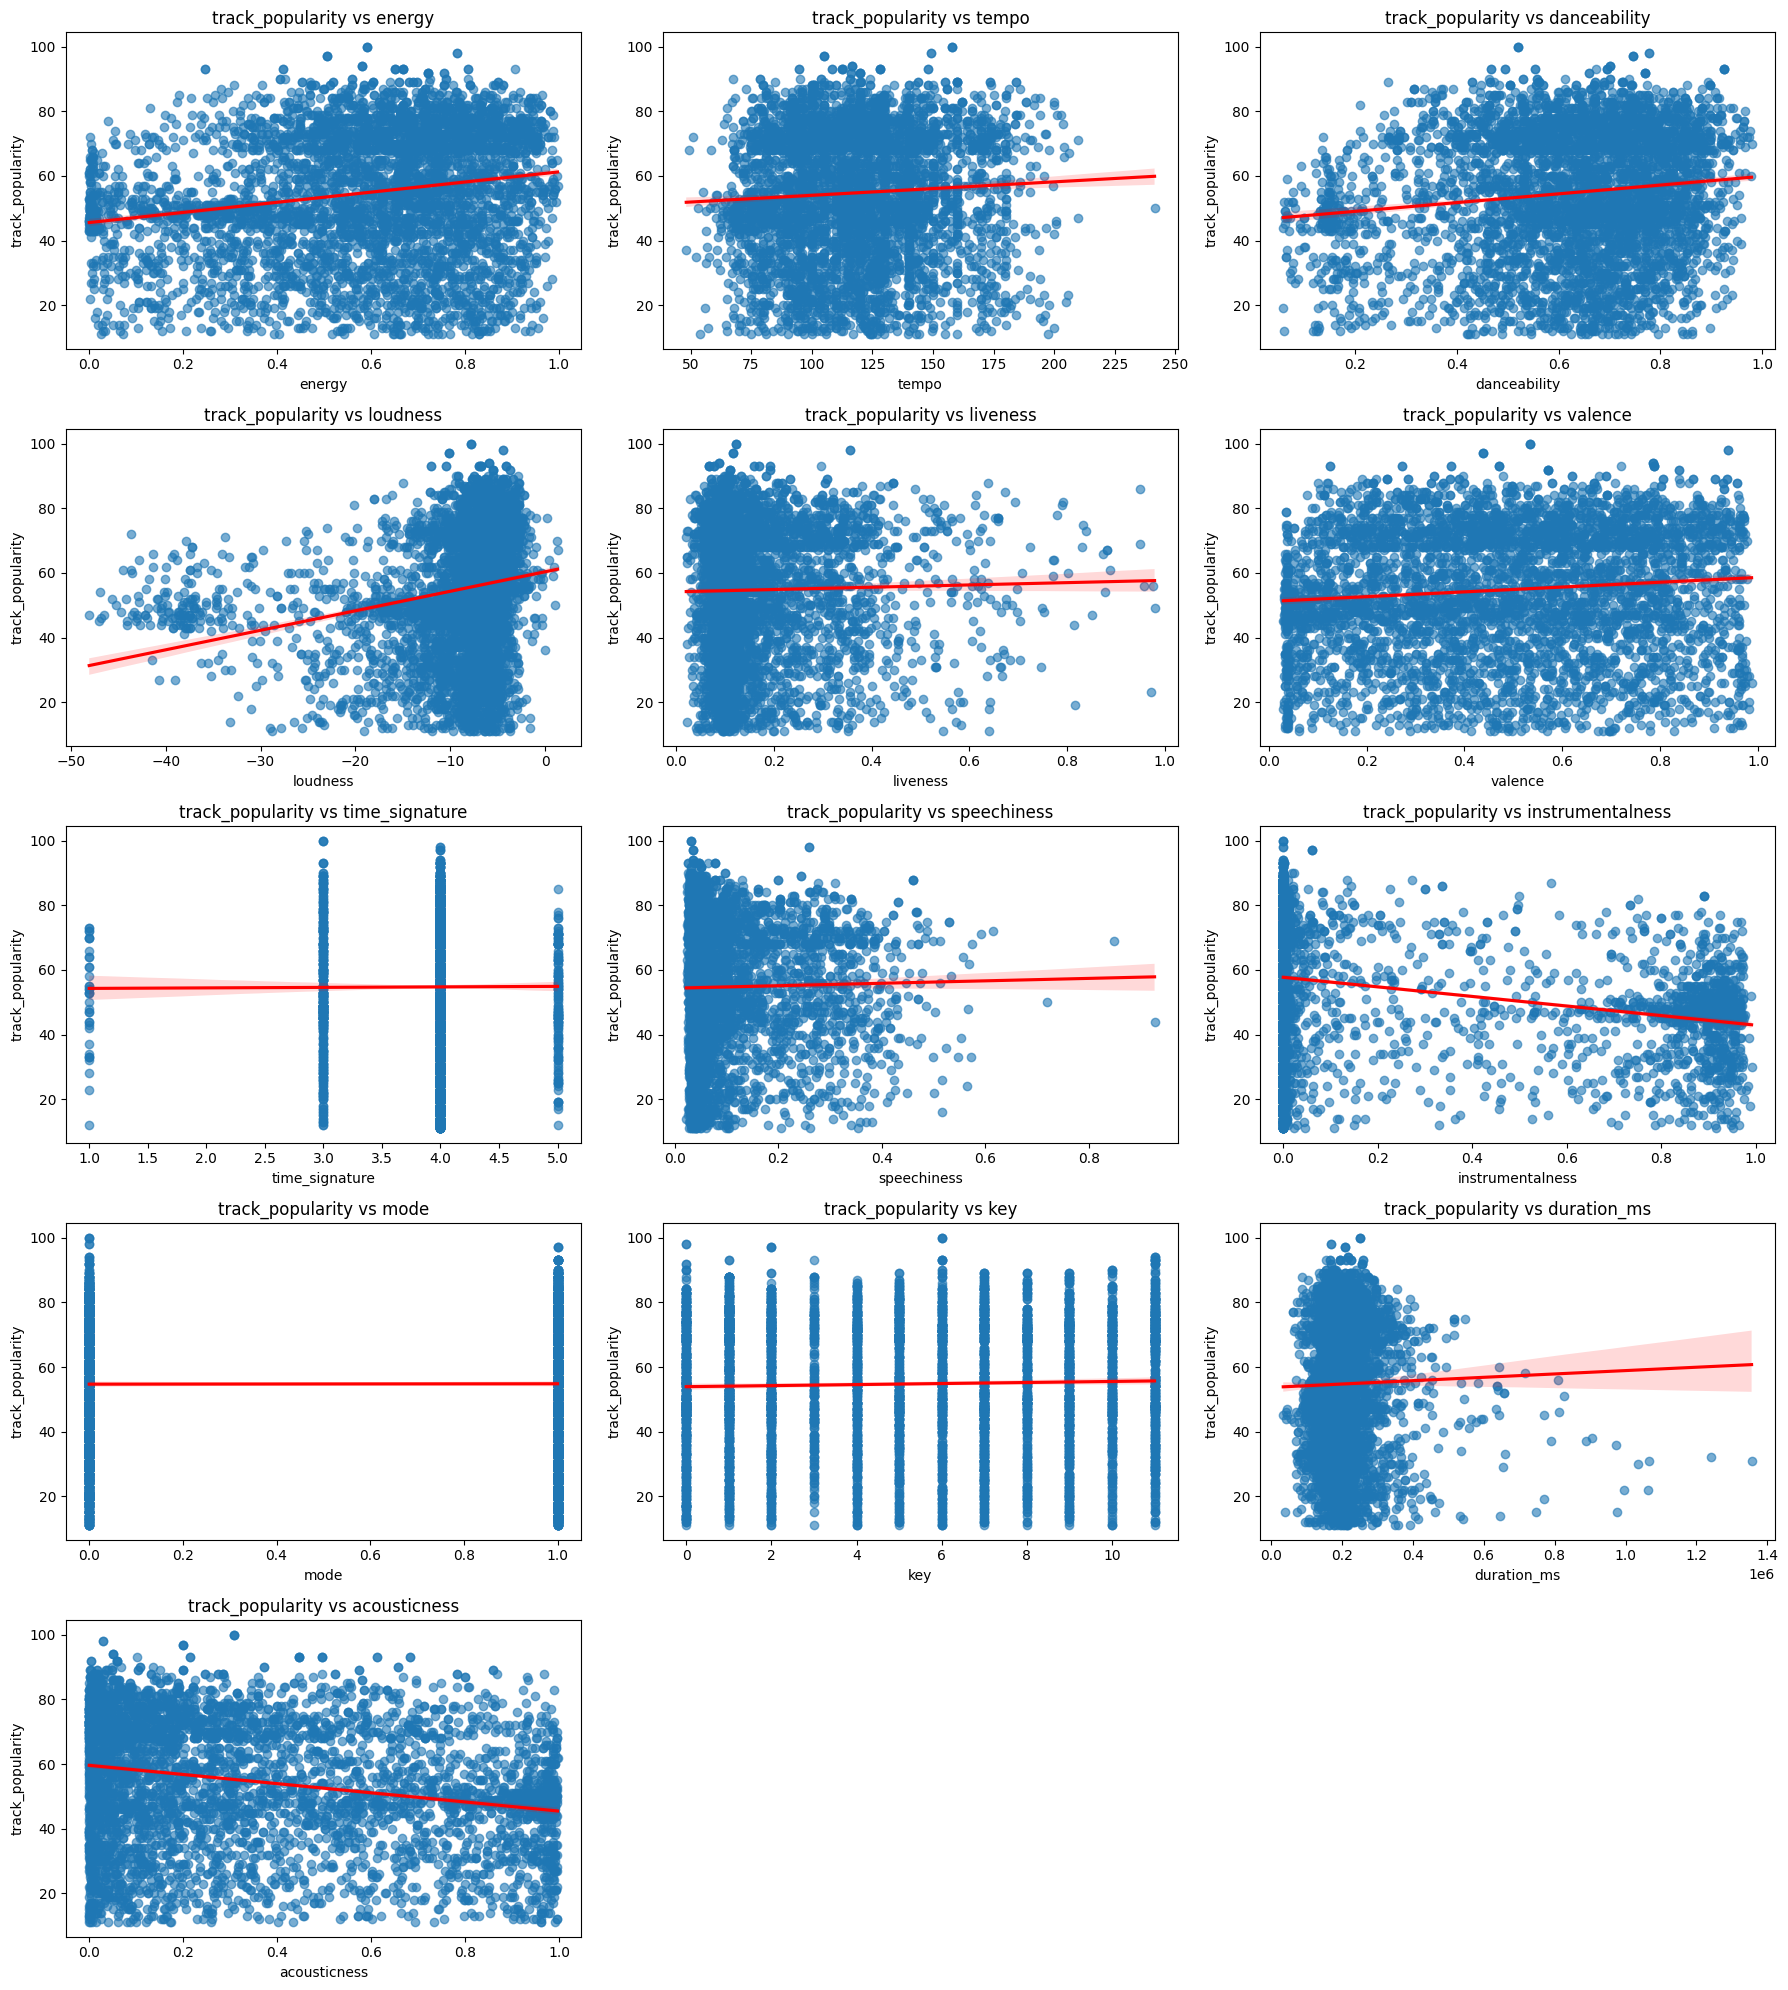

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÁõÆÊ®ôËÆäÊï∏ËàáËá™ËÆäÊï∏
response = "track_popularity"
predictors = df.select_dtypes(include="number").columns.tolist()
predictors.remove(response)

# Áï´ÂúñÊéíÁâàÔºàÊØèÂàóÊúÄÂ§ö 3 ÂºµÂúñÔºâ
n_cols = 3
n_rows = (len(predictors) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))

for idx, var in enumerate(predictors):
    row = idx // n_cols
    col = idx % n_cols
    ax = axs[row][col] if n_rows > 1 else axs[col]

    sns.regplot(
        x=var, y=response, data=df,
        ax=ax,
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    ax.set_title(f"{response} vs {var}")
    ax.set_xlabel(var)
    ax.set_ylabel(response)

# Â¶ÇÊûúÂúñË°®Êï∏‰∏çÊòØÂâõÂ•ΩÂ°´ÊªøÔºåÊääÂ§öÂá∫‰æÜÁöÑÁ©∫ÂúñÊ∏ÖÊéâ
total_plots = n_rows * n_cols
if total_plots > len(predictors):
    for idx in range(len(predictors), total_plots):
        fig.delaxes(axs[idx // n_cols][idx % n_cols])

plt.tight_layout()
plt.show()


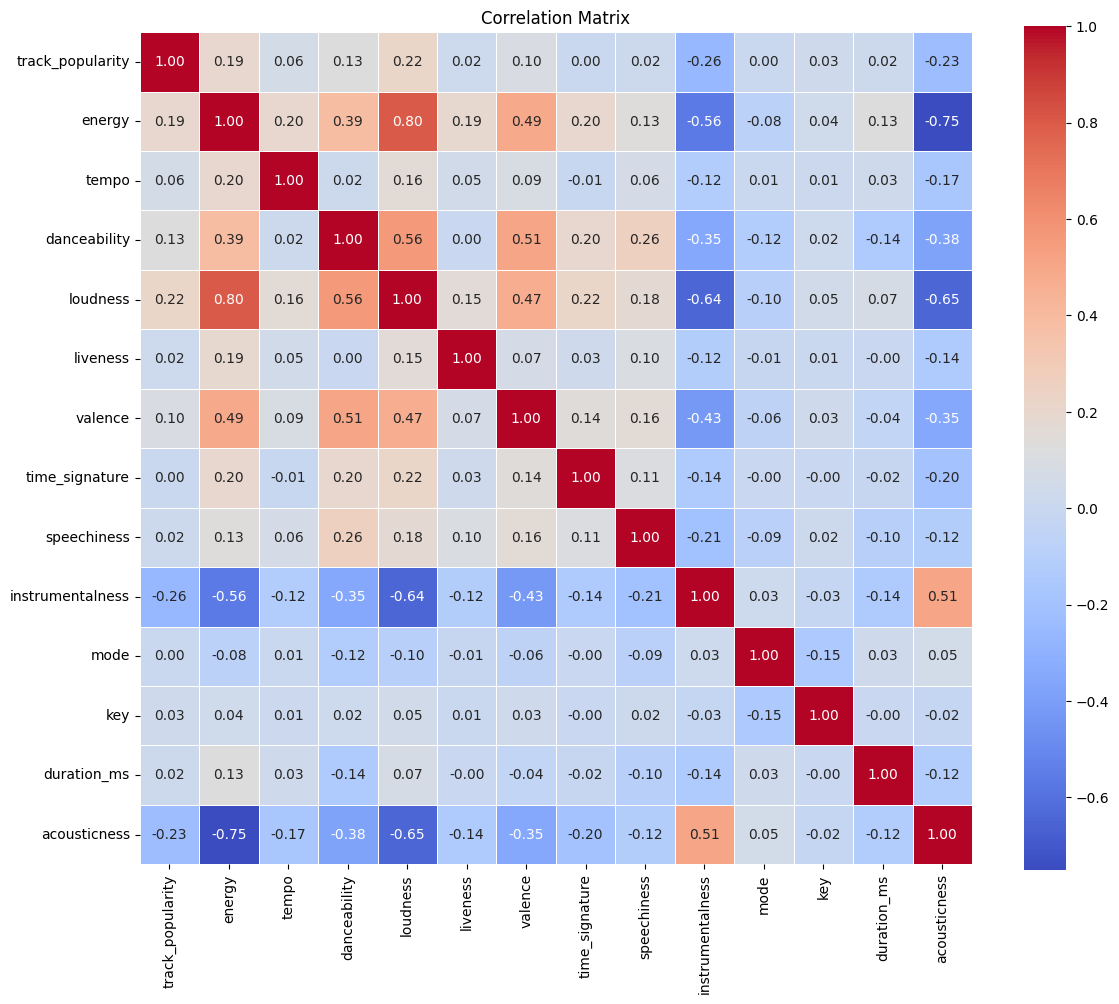

In [ ]:
# 2) Correlation Matrix (‰øÇÊï∏Áü©Èô£)
# ÂÖàÁµÑÊàêÂè™Âê´Êï∏ÂÄºÊ¨Ñ‰ΩçÁöÑ DataFrame
corr_vars = [response] + predictors
corr = df[corr_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,      # Âú®ÊØèÂÄãÊ†ºÂ≠êÈ°ØÁ§∫Êï∏ÂÄº
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 3 Ë≥áÊñôÂâçËôïÁêÜ

### ÂéªÈô§ÂîØ‰∏ÄÔºàÊõ≤Âêç„ÄÅUID„ÄÅÊí≠ÊîæÊ∏ÖÂñÆÂêçÔºâÊ¨Ñ‰Ωç

In [5]:
drop_cols = ['track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'type', 'playlist_id', 'playlist_subgenre']

df_dropped = df.drop(columns=drop_cols)
df_dropped = df_dropped.dropna()

### Âêà‰ΩµÊ¨Ñ‰Ωç

In [7]:
# Âêà‰Ωµ rare genres ÁÇ∫ "ÂÖ∂‰ªñ"
threshold = 80  # Â∞ëÊñº 50 ÂâáË¶ñÁÇ∫ rare
vc = df_dropped['playlist_genre'].value_counts()
rare = vc[vc < threshold].index
df_dropped['playlist_genre'] = df_dropped['playlist_genre'].replace(rare, 'other')
df_dropped['track_artist'] = df_dropped['track_artist'].str.split(',').str[0].str.strip()
df_dropped['playlist_genre'].value_counts()

playlist_genre
other         670
electronic    589
pop           515
latin         425
hiphop        395
ambient       359
rock          345
lofi          298
world         228
arabic        208
brazilian     148
jazz          146
gaming        133
classical     121
blues          88
afrobeats      82
wellness       80
Name: count, dtype: int64

### Ë®≠ÂÆöËôõÊì¨ËÆäÊï∏

In [15]:

# Ë¶ÅËΩâÊèõÁÇ∫ dummy ÁöÑÊ¨Ñ‰Ωç
dummy_columns = ["playlist_genre", "time_signature", "mode", "key"]
for col in ["time_signature", "mode", "key"]:
    if col in df_dropped.columns:
        df_dropped[col] = df_dropped[col].apply(lambda x: str(int(x)) if pd.notnull(x) else "unknown")
        
print(df_dropped[dummy_columns])

# ÈÅéÊøæÂá∫ df ‰∏≠ÂØ¶ÈöõÂ≠òÂú®ÁöÑÊ¨Ñ‰Ωç
available_columns = [col for col in dummy_columns if col in df_dropped.columns]

# ‚úÖ prefix ‰πü‰æùÁÖß available_columns Â∞çÈΩä
dummies = pd.get_dummies(df_dropped[available_columns], drop_first=True)

# Âêà‰ΩµÈÄ≤ÂéüÂßãË≥áÊñôÔºàÁßªÈô§ÂéüÈ°ûÂà•Ê¨Ñ‰ΩçÔºâ
df_dummy = pd.concat([df_dropped.drop(columns=available_columns), dummies], axis=1)
print(df_dummy.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_dummy.head())

df_dummy = df_dummy.reset_index(drop=True)
print(df_dummy['playlist_genre_electronic'].value_counts(normalize=True))


     playlist_genre time_signature mode key
0               pop              3    0   6
1               pop              4    1   2
2               pop              4    1   1
3               pop              4    0   0
4               pop              4    0   0
...             ...            ...  ...  ..
4826          other              1    1  10
4827          other              4    1   8
4828          other              4    1   3
4829          other              1    0   8
4830          other              4    1   8

[4830 rows x 4 columns]
(4830, 43)
   energy    tempo  danceability  loudness  liveness  valence  \
0   0.592  157.969         0.521    -7.777     0.122    0.535   
1   0.507  104.978         0.747   -10.171     0.117    0.438   
2   0.808  108.548         0.554    -4.169     0.159    0.372   
3   0.910  112.966         0.670    -4.070     0.304    0.786   
4   0.783  149.027         0.777    -4.477     0.355    0.939   

        track_artist  speechiness  track_popu

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# ÂÅáË®≠ df ÊòØ‰Ω†ÁöÑË≥áÊñô
response = 'track_popularity'

# Step 1: Áï∞Â∏∏ÂÄºÂÅµÊ∏¨
def detect_outliers(df, response):
    predictors = df.columns.tolist()
    predictors.remove(response)
    formula = f"{response} ~ {' + '.join(predictors)}"
    model = smf.ols(formula=formula, data=df)
    result = model.fit()
    influence = result.get_influence()
    std_resid = influence.resid_studentized_internal
    leverage = influence.hat_matrix_diag
    cooks_d = influence.cooks_distance[0]
    outlier_df = pd.DataFrame({'std_resid': std_resid, 'leverage': leverage, 'cooks_d': cooks_d})
    outlier_flags = (
        (np.abs(outlier_df['std_resid']) > 3) |
        (outlier_df['leverage'] > 3 * np.mean(leverage)) |
        (outlier_df['cooks_d'] > 4 / len(df))
    )
    outlier_index = outlier_df[outlier_flags].index
    return outlier_index

# Step 2: Forward Selection
def forward_selection(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data=data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break
    return selected

# Step 3: Backward Elimination
def backward_elimination(data, response, threshold_out=0.05):
    predictors = list(data.columns)
    predictors.remove(response)

    while True:
        formula = "{} ~ {}".format(response, ' + '.join(predictors))
        model = smf.ols(formula, data=data).fit()
        p_values = model.pvalues.iloc[1:]  # skip intercept
        worst_pval = p_values.max()
        if worst_pval > threshold_out:
            worst_feature = p_values.idxmax()
            predictors.remove(worst_feature)
        else:
            break
    return predictors

# --- ‰∏ªÊµÅÁ®ãÈñãÂßã ---

# (1) ÁßªÈô§Áï∞Â∏∏ÂÄº
outliers = detect_outliers(df, response)
df_clean = df.drop(index=outliers)
print(f"Â∑≤ÁßªÈô§Áï∞Â∏∏ÂÄºÔºåÂÖ± {len(outliers)} Á≠Ü")

# (2) Forward ÈÅ∏ÊìáËÆäÊï∏
forward_vars = forward_selection(df_clean, response)
print("Forward ÈÅ∏ÊìáÁöÑËÆäÊï∏Ôºö", forward_vars)

# (3) Backward Âà™Èô§‰∏çÈ°ØËëóËÆäÊï∏
df_forward = df_clean[[response] + forward_vars]
final_vars = backward_elimination(df_forward, response)
print("Backward Âæå‰øùÁïôÁöÑËÆäÊï∏Ôºö", final_vars)

# (4) ÊúÄÁµÇÊ®°Âûã
final_formula = f"{response} ~ {' + '.join(final_vars)}"
final_model = smf.ols(formula=final_formula, data=df_forward).fit()
print(final_model.summary())


### Áï∞Â∏∏ÂÄºÊ™¢Ê∏¨

In [ ]:
# Áï∞Â∏∏ÂÄºÂÅµÊ∏¨
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

# Step 1: Âª∫Á´ãÂÖ¨ÂºèÂ≠ó‰∏≤
response = 'track_popularity'
predictors = df.columns.tolist()
predictors.remove(response)
formula = f"{response} ~ {' + '.join(predictors)}"

# Step 2: Âª∫Á´ãÊ®°Âûã
model = smf.ols(formula=formula, data=pd.concat([df], axis=1))
result = model.fit()

# Step 3: ÂèñÂæóÂΩ±ÈüøÂäõÊåáÊ®ô
influence = result.get_influence()
std_resid = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Step 4: ÁµÑÊàêÁï∞Â∏∏ÂÄºË≥áÊñôË°®
outlier_df = pd.DataFrame({
    'std_resid': std_resid,
    'leverage': leverage,
    'cooks_d': cooks_d
})

# Step 5: Âà§Êñ∑ÊΩõÂú®Áï∞Â∏∏ËßÄÊ∏¨ÂÄº
outlier_flags = (
    (np.abs(outlier_df['std_resid']) > 3) |
    (outlier_df['leverage'] > 3 * np.mean(leverage)) |
    (outlier_df['cooks_d'] > 4 / len(df))
)

# Step 6: È°ØÁ§∫ÊΩõÂú®Áï∞Â∏∏ÂÄºÊï∏ÈáèËàá index
print("ÊΩõÂú®Áï∞Â∏∏ÂÄºÊï∏ÈáèÔºö", outlier_flags.sum())
print("ÊΩõÂú®Áï∞Â∏∏ËßÄÊ∏¨ indexÔºö", outlier_df[outlier_flags].index.tolist())



### ÂÖ±Á∑öÊÄßÂàÜÊûê

In [ ]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# ‰øùÁïôÊï∏ÂÄºÊ¨Ñ‰ΩçÔºåË£ú‰∏äÂ∏∏Êï∏ÔºåÊ∏ÖÈô§ inf/NaN
X = df.select_dtypes(include=['number']).copy()
X = add_constant(X)
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Ë®àÁÆó VIF
vif_df = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# ÊéíÈô§Â∏∏Êï∏È†ÖÔºå‰∏¶Áî±È´òËá≥‰ΩéÊéíÂ∫è
vif_df = vif_df[vif_df['Variable'] != 'const'].sort_values(by='VIF', ascending=False)
print(vif_df)


            Variable       VIF
1             energy  4.232105
4           loudness  3.991195
12      acousticness  2.445031
3       danceability  1.918360
8   instrumentalness  1.883395
6            valence  1.658351
7        speechiness  1.116395
11       duration_ms  1.095963
5           liveness  1.058376
2              tempo  1.052612
9               mode  1.046748
10               key  1.024755


# 4 ÂõûÊ≠∏ÂàÜÊûê

# 4-1 Forward Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def forward_selection(data, response, candidate_predictors):
    selected = []
    remaining = candidate_predictors[:]
    best_aic = float('inf')
    best_model = None

    while remaining:
        aic_with_candidates = []
        for predictor in remaining:
            formula = f"{response} ~ " + " + ".join(selected + [predictor])
            model = smf.ols(formula, data=data).fit()
            aic_with_candidates.append((model.aic, predictor, model))

        aic_with_candidates.sort()
        best_candidate_aic, best_candidate, candidate_model = aic_with_candidates[0]

        if best_candidate_aic < best_aic:
            best_aic = best_candidate_aic
            selected.append(best_candidate)
            remaining.remove(best_candidate)
            best_model = candidate_model
        else:
            break

    return best_model

model_data = pd.concat([df["track_popularity"], df_model], axis=1)
forward_model = forward_selection(model_data, "track_popularity", df_model.columns.tolist())
print(forward_model.summary())


                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     63.79
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        07:02:27   Log-Likelihood:                -20402.
No. Observations:                4830   AIC:                         4.087e+04
Df Residuals:                    4796   BIC:                         4.109e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# 4-2 Backward Regression

In [ ]:
def backward_elimination(data, response, predictors, threshold_out=0.05):
    selected = predictors[:]
    while True:
        formula = f"{response} ~ " + " + ".join(selected)
        model = smf.ols(formula, data=data).fit()
        pvalues = model.pvalues.iloc[1:]  # ÊéíÈô§ Intercept

        worst_pval = pvalues.max()
        worst_var = pvalues.idxmax()

        # Â¶ÇÊûú worst_var ‰∏çÂú® selectedÔºåÂ∞±Ë∑≥ÈÅéÈÄôËº™ÔºàÈÄöÂ∏∏ÊòØ dummy ÊàñËá™ÂãïËΩâÊèõÊ¨Ñ‰ΩçÔºâ
        if worst_pval > threshold_out and worst_var in selected:
            selected.remove(worst_var)
        elif worst_pval > threshold_out and worst_var not in selected:
            print(f"Ë≠¶ÂëäÔºöËÆäÊï∏ {worst_var} ‰∏çÂú®ÂéüÂßãÊ¨Ñ‰Ωç‰∏≠ÔºåÁï•ÈÅéÂâîÈô§")
            break
        else:
            break

    final_formula = f"{response} ~ {' + '.join(selected)}"
    return smf.ols(final_formula, data=data).fit()


backward_model = backward_elimination(model_data, "track_popularity", df.columns.tolist())
print(backward_model.summary())


Ë≠¶ÂëäÔºöËÆäÊï∏ genre_soul[T.True] ‰∏çÂú®ÂéüÂßãÊ¨Ñ‰Ωç‰∏≠ÔºåÁï•ÈÅéÂâîÈô§
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     46.93
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        07:09:58   Log-Likelihood:                -20398.
No. Observations:                4830   AIC:                         4.089e+04
Df Residuals:                    4784   BIC:                         4.119e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

# 4-3 Best subset regression using adjusted R^2

Not applied due to computation resource limit

In [ ]:
import statsmodels.formula.api as smf
from itertools import combinations
import numpy as np

def best_subset_regression_formula(data, response, predictors):
    best_score = -np.inf
    best_model = None
    best_vars = None
    n = data.shape[0]

    results = []

    for k in range(1, len(predictors) + 1):
        for combo in combinations(predictors, k):
            formula = f"{response} ~ " + " + ".join(combo)
            model = smf.ols(formula, data=data).fit()
            r2_adj = model.rsquared_adj

            results.append((combo, r2_adj, model))

            if r2_adj > best_score:
                best_score = r2_adj
                best_model = model
                best_vars = combo

    return best_vars, best_score, best_model

# ‰∫ãÂÖàÊ∫ñÂÇôË≥áÊñô
model_data = pd.concat([df["track_popularity"], df_model], axis=1)
predictors = df_model.columns.tolist()

# Âü∑Ë°å Best Subset Regression
best_vars, best_score, best_model = best_subset_regression_formula(model_data, "track_popularity", predictors)

# Ëº∏Âá∫ÁµêÊûú
print("ÊúÄ‰Ω≥ËÆäÊï∏ÁµÑÂêàÔºö", best_vars)
print("Adjusted R¬≤Ôºö", round(best_score, 4))
print(best_model.summary())


# 5 ÊÆòÂ∑ÆÂàÜÊûê

### 5-1 Forward Regression

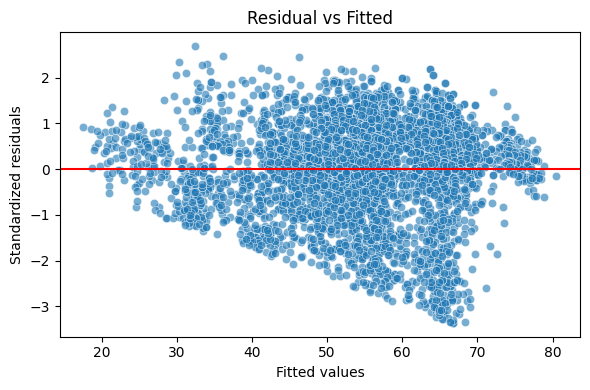

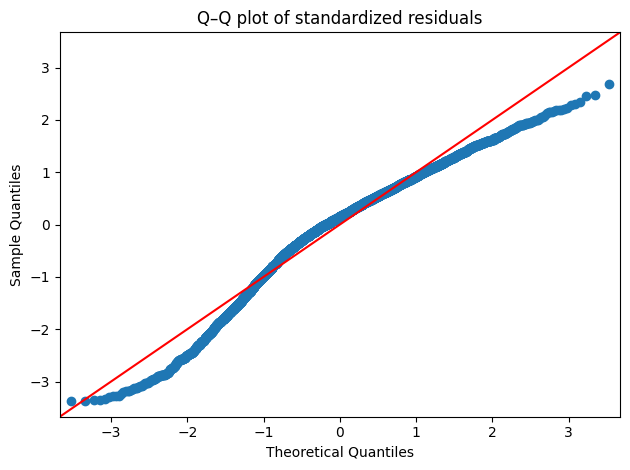

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# ‰ª• forward_model ÁÇ∫‰æã
resid = forward_model.get_influence().resid_studentized_internal
fitted = forward_model.fittedvalues

# ÊÆòÂ∑Æ vs È†êÊ∏¨ÂÄº
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Standardized residuals")
plt.title("Residual vs Fitted")
plt.tight_layout()
plt.show()

# Q-Q plot
sm.qqplot(resid, line='45', fit=True)
plt.title("Q‚ÄìQ plot of standardized residuals")
plt.tight_layout()
plt.show()



üìä Ê≠£ÊÖãÊÄßÊ™¢ÂÆö
Shapiro-Wilk test: W = 0.9630, p = 0.0000
‚ùå Reject H0 ‚Üí ÊÆòÂ∑Æ‰∏çÁ¨¶ÂêàÂ∏∏ÊÖãÊÄß


<Figure size 600x600 with 0 Axes>

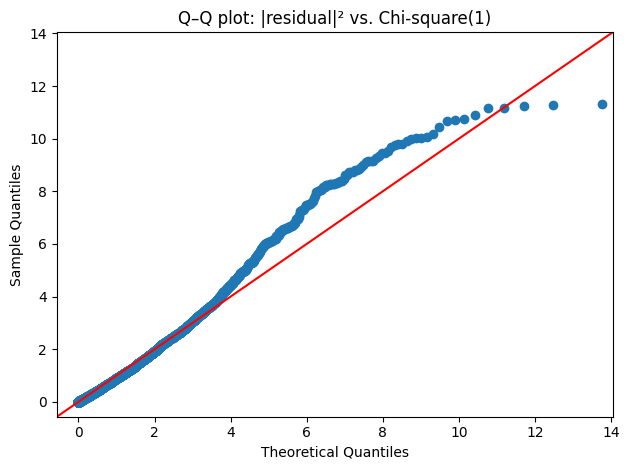


üìä Áï∞Ë≥™ËÆäÁï∞Ê™¢ÂÆöÔºàÁõÆË¶ñÔºâ


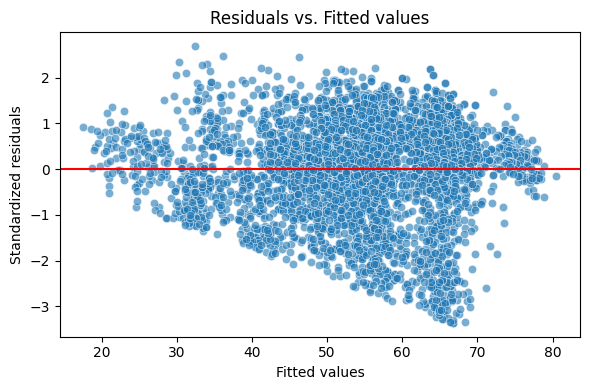

‚úÖ Ëã•ÊÆòÂ∑ÆÁÑ°ÊòéÈ°ØÊâáÂΩ¢„ÄÅÊºèÊñóÁãÄÔºåÂç≥ÂèØË™çÁÇ∫ËÆäÁï∞Êï∏ÁÇ∫Â∏∏Êï∏ÔºàhomoscedasticityÔºâ

üìä Áç®Á´ãÊÄßÊ™¢ÂÆöÔºàRuns TestÔºâ
Runs Test: stat = -41.4269, p = 0.0000
‚ùå Reject H0 ‚Üí ÊÆòÂ∑ÆÂèØËÉΩ‰∏çÁç®Á´ã


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.sandbox.stats.runs import runstest_1samp

# 1. ÂèñÂá∫ÊÆòÂ∑ÆËàáÈ†êÊ∏¨ÂÄº
resid = forward_model.get_influence().resid_studentized_internal
fitted = forward_model.fittedvalues

# -----------------------------------------------------
# (a) Â∏∏ÊÖãÊÄßÊ™¢ÂÆö
print("\nüìä Ê≠£ÊÖãÊÄßÊ™¢ÂÆö")

# 1.1 Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(resid)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("‚úÖ Do not reject H0 ‚Üí ÊÆòÂ∑ÆÁ¨¶ÂêàÂ∏∏ÊÖãÊÄß")
else:
    print("‚ùå Reject H0 ‚Üí ÊÆòÂ∑Æ‰∏çÁ¨¶ÂêàÂ∏∏ÊÖãÊÄß")

# 1.2 Chi-square Q‚ÄìQ plot
plt.figure(figsize=(6, 6))
abs_resid_squared = np.square(np.abs(resid))
sm.qqplot(abs_resid_squared, dist=stats.chi2, distargs=(1,), line='45')
plt.title("Q‚ÄìQ plot: |residual|¬≤ vs. Chi-square(1)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# (b) Á≠âËÆäÁï∞ÊÄßÊ™¢ÂÆöÔºàhomoscedasticityÔºâ
print("\nüìä Áï∞Ë≥™ËÆäÁï∞Ê™¢ÂÆöÔºàÁõÆË¶ñÔºâ")

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Standardized residuals")
plt.title("Residuals vs. Fitted values")
plt.tight_layout()
plt.show()
print("‚úÖ Ëã•ÊÆòÂ∑ÆÁÑ°ÊòéÈ°ØÊâáÂΩ¢„ÄÅÊºèÊñóÁãÄÔºåÂç≥ÂèØË™çÁÇ∫ËÆäÁï∞Êï∏ÁÇ∫Â∏∏Êï∏ÔºàhomoscedasticityÔºâ")

# -----------------------------------------------------
# (c) Áç®Á´ãÊÄßÊ™¢ÂÆöÔºàruns testÔºâ
print("\nüìä Áç®Á´ãÊÄßÊ™¢ÂÆöÔºàRuns TestÔºâ")

runs_stat, runs_p = runstest_1samp(resid, cutoff='mean')
print(f"Runs Test: stat = {runs_stat:.4f}, p = {runs_p:.4f}")
if runs_p > 0.05:
    print("‚úÖ Do not reject H0 ‚Üí ÊÆòÂ∑ÆÁç®Á´ã")
else:
    print("‚ùå Reject H0 ‚Üí ÊÆòÂ∑ÆÂèØËÉΩ‰∏çÁç®Á´ã")


### 5-2 Backward Regression

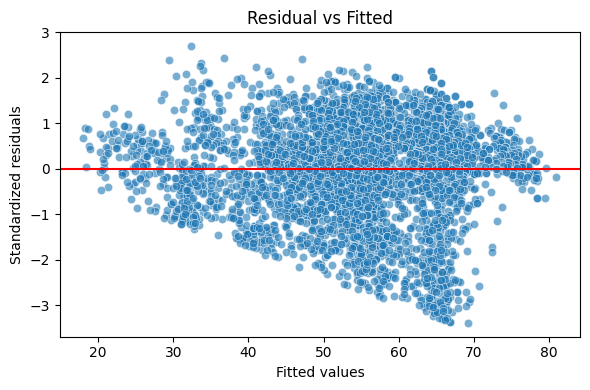

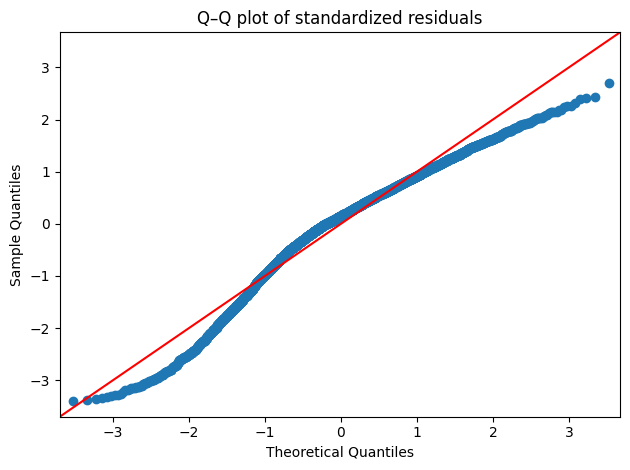

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# ‰ª• backward_model ÁÇ∫‰æã
resid = backward_model.get_influence().resid_studentized_internal
fitted = backward_model.fittedvalues

# ÊÆòÂ∑Æ vs È†êÊ∏¨ÂÄº
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Standardized residuals")
plt.title("Residual vs Fitted")
plt.tight_layout()
plt.show()

# Q-Q plot
sm.qqplot(resid, line='45', fit=True)
plt.title("Q‚ÄìQ plot of standardized residuals")
plt.tight_layout()
plt.show()



üìä Ê≠£ÊÖãÊÄßÊ™¢ÂÆö
Shapiro-Wilk test: W = 0.9628, p = 0.0000
‚ùå Reject H0 ‚Üí ÊÆòÂ∑Æ‰∏çÁ¨¶ÂêàÂ∏∏ÊÖãÊÄß


<Figure size 600x600 with 0 Axes>

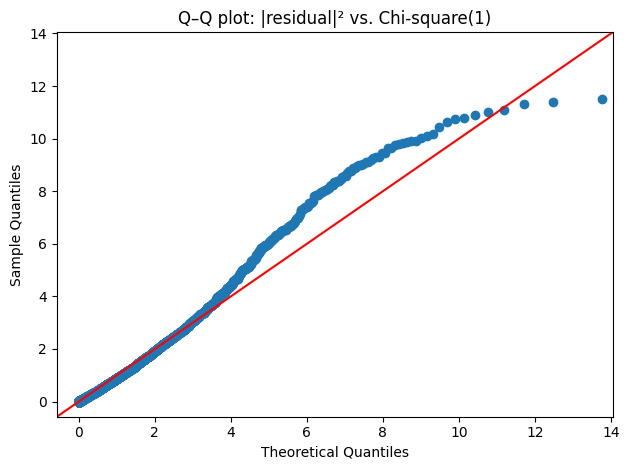


üìä Áï∞Ë≥™ËÆäÁï∞Ê™¢ÂÆöÔºàÁõÆË¶ñÔºâ


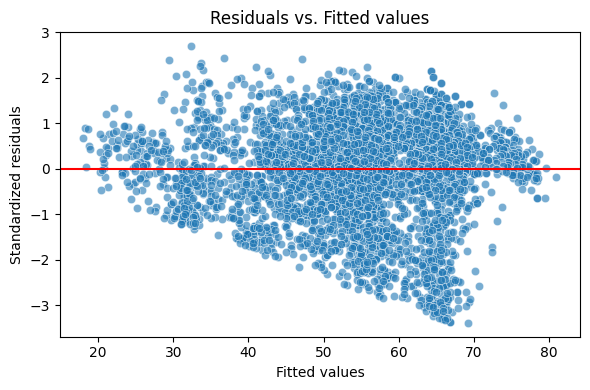

‚úÖ Ëã•ÊÆòÂ∑ÆÁÑ°ÊòéÈ°ØÊâáÂΩ¢„ÄÅÊºèÊñóÁãÄÔºåÂç≥ÂèØË™çÁÇ∫ËÆäÁï∞Êï∏ÁÇ∫Â∏∏Êï∏ÔºàhomoscedasticityÔºâ

üìä Áç®Á´ãÊÄßÊ™¢ÂÆöÔºàRuns TestÔºâ
Runs Test: stat = -41.8681, p = 0.0000
‚ùå Reject H0 ‚Üí ÊÆòÂ∑ÆÂèØËÉΩ‰∏çÁç®Á´ã


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.sandbox.stats.runs import runstest_1samp

# 1. ÂèñÂá∫ÊÆòÂ∑ÆËàáÈ†êÊ∏¨ÂÄº
resid = backward_model.get_influence().resid_studentized_internal
fitted = backward_model.fittedvalues

# -----------------------------------------------------
# (a) Â∏∏ÊÖãÊÄßÊ™¢ÂÆö
print("\nüìä Ê≠£ÊÖãÊÄßÊ™¢ÂÆö")

# 1.1 Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(resid)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("‚úÖ Do not reject H0 ‚Üí ÊÆòÂ∑ÆÁ¨¶ÂêàÂ∏∏ÊÖãÊÄß")
else:
    print("‚ùå Reject H0 ‚Üí ÊÆòÂ∑Æ‰∏çÁ¨¶ÂêàÂ∏∏ÊÖãÊÄß")

# 1.2 Chi-square Q‚ÄìQ plot
plt.figure(figsize=(6, 6))
abs_resid_squared = np.square(np.abs(resid))
sm.qqplot(abs_resid_squared, dist=stats.chi2, distargs=(1,), line='45')
plt.title("Q‚ÄìQ plot: |residual|¬≤ vs. Chi-square(1)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# (b) Á≠âËÆäÁï∞ÊÄßÊ™¢ÂÆöÔºàhomoscedasticityÔºâ
print("\nüìä Áï∞Ë≥™ËÆäÁï∞Ê™¢ÂÆöÔºàÁõÆË¶ñÔºâ")

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Standardized residuals")
plt.title("Residuals vs. Fitted values")
plt.tight_layout()
plt.show()
print("‚úÖ Ëã•ÊÆòÂ∑ÆÁÑ°ÊòéÈ°ØÊâáÂΩ¢„ÄÅÊºèÊñóÁãÄÔºåÂç≥ÂèØË™çÁÇ∫ËÆäÁï∞Êï∏ÁÇ∫Â∏∏Êï∏ÔºàhomoscedasticityÔºâ")

# -----------------------------------------------------
# (c) Áç®Á´ãÊÄßÊ™¢ÂÆöÔºàruns testÔºâ
print("\nüìä Áç®Á´ãÊÄßÊ™¢ÂÆöÔºàRuns TestÔºâ")

runs_stat, runs_p = runstest_1samp(resid, cutoff='mean')
print(f"Runs Test: stat = {runs_stat:.4f}, p = {runs_p:.4f}")
if runs_p > 0.05:
    print("‚úÖ Do not reject H0 ‚Üí ÊÆòÂ∑ÆÁç®Á´ã")
else:
    print("‚ùå Reject H0 ‚Üí ÊÆòÂ∑ÆÂèØËÉΩ‰∏çÁç®Á´ã")


# 6 Ê≠∑Âè≤Á¥ÄÈåÑ

ÂàùÊ≠• OLS ÂõûÊ≠∏Ê®°ÂûãÂàÜÊûêÔºàËàäÁâàÔºåÁõ¥Êé•drop_colsÔºâ



In [ ]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True)

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors], genre_dummies], axis=1)

# Ëá™ÂãïÁî¢ÁîüÂÖ¨Âºè
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# Âª∫Ê®°
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# È°ØÁ§∫ÁµêÊûú
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     45.90
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        07:04:02   Log-Likelihood:                -20398.
No. Observations:                4830   AIC:                         4.089e+04
Df Residuals:                    4783   BIC:                         4.120e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

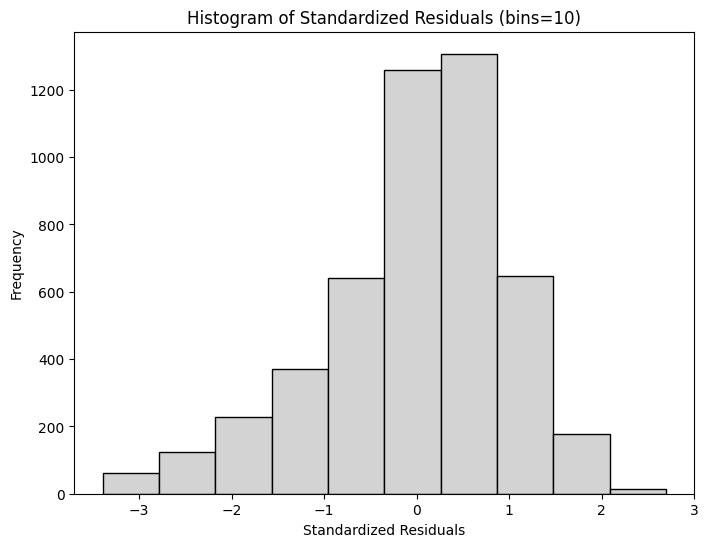

In [ ]:
import matplotlib.pyplot as plt

# Ë®àÁÆóÊ®ôÊ∫ñÂåñÊÆòÂ∑Æ
influence = result.get_influence()
std_resid = influence.resid_studentized_internal

# Áï´Áõ¥ÊñπÂúñ
plt.figure(figsize=(8, 6))
plt.hist(std_resid, bins=10, facecolor='lightgrey', edgecolor='black')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals (bins=10)')
plt.show()


## Backward Stepwise Regression
### ÊáâËÆäÊï∏ÁÇ∫ track_popularity


In [ ]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

# print(data.shape)
# display(data['genre_ambient'].value_counts())
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

liveness is removed with p-value 0.9714.

genre_soul is removed with p-value 0.8937.

genre_mandopop is removed with p-value 0.7334.

genre_lofi is removed with p-value 0.7634.

genre_ambient is removed with p-value 0.6624.

duration_ms is removed with p-value 0.6585.

mode is removed with p-value 0.5505.

acousticness is removed with p-value 0.4246.

genre_latin is removed with p-value 0.3427.

genre_reggae is removed with p-value 0.3427.

genre_country is removed with p-value 0.2861.

tempo is removed with p-value 0.2366.

energy is removed with p-value 0.1674.

genre_jazz is removed with p-value 0.1677.

genre_electronic is removed with p-value 0.0753.

genre_indie is removed with p-value 0.0577.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.300
Method:                

### üîç ÊÆòÂ∑ÆÂúñËßÄÂØüÈáçÈªû
#### ‚úÖ Ê∞¥Âπ≥Ê©òÁ∑öÊòØÊÆòÂ∑ÆÂπ≥ÂùáÁ∑öÔºà0Ôºâ
Ê≠£Â∏∏ÊÉÖÊ≥Å‰∏ãÔºåÈªûÊáâÂ§ßËá¥ÂàÜÂ∏ÉÂú®Ê©òÁ∑ö‰∏ä‰∏ãÔºåÁÑ°ÊòéÈ°ØÂΩ¢ÁãÄ„ÄÇ

#### ‚ùå Âúñ‰∏≠ÂïèÈ°å
ÊºèÊñóÂΩ¢ÔºàÂè≥ÂÅ¥ËºÉÁ™ÑÔºâÔºö

Ë°®Á§∫ Áï∞Ë≥™ËÆäÁï∞ÔºàheteroscedasticityÔºâÔºåÈ†êÊ∏¨ÂÄºË∂äÂ§ßÊôÇÊÆòÂ∑ÆËÆäÁï∞Ë∂äÂ∞èÔºåÈÄôÈÅïÂèç‰∫ÜËø¥Ê≠∏ÂàÜÊûêÁöÑÂü∫Êú¨ÂÅáË®≠ÔºàÊÆòÂ∑ÆËÆäÁï∞ÊáâË©≤‰∏ÄËá¥Ôºâ„ÄÇ

ÊÑèÂë≥ËëóÊ®°ÂûãÂ∞çÊñº‰∏çÂêåÈ†êÊ∏¨ÂÄºÁöÑËß£ÈáãÂäõ‰∏ç‰∏ÄËá¥ÔºåÂèØËÉΩÂú®‰∏≠‰ΩéÈ†êÊ∏¨ÂÄºÊôÇÂ§±Ê∫ñ„ÄÇ

ÈùûÈö®Ê©üÂàÜÂ∏ÉÔºö

Ê≠£Â∏∏ÁöÑÊÆòÂ∑ÆÂúñÊáâÂëàÁèæÁÑ°Ë¶èÂæãÁöÑÈõ≤ÁãÄÂàÜÂ∏ÉÔºå‰ΩÜÈÄôÂºµÂúñÂëàÁèæÊüêÁ®ÆÈåêÂΩ¢ÔºåÂèØËÉΩ‰ª£Ë°®Ê®°ÂûãÂΩ¢ÂºèÈåØË™§Ôºà‰æãÂ¶ÇÂ∞ë‰∫ÜÈùûÁ∑öÊÄßÈ†ÖÔºâ„ÄÇ

Text(0, 0.5, 'Standardized Residuals of track popularity')

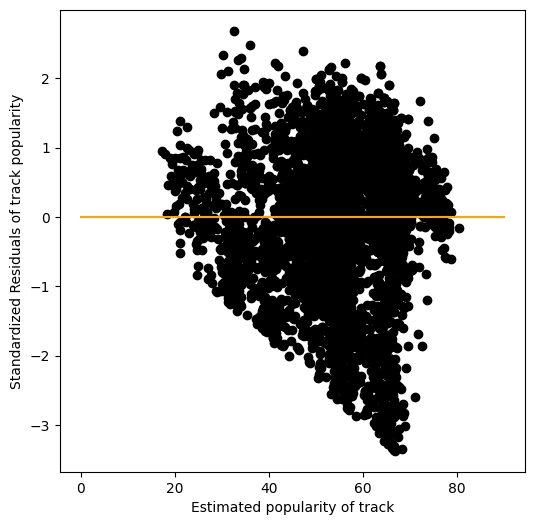

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

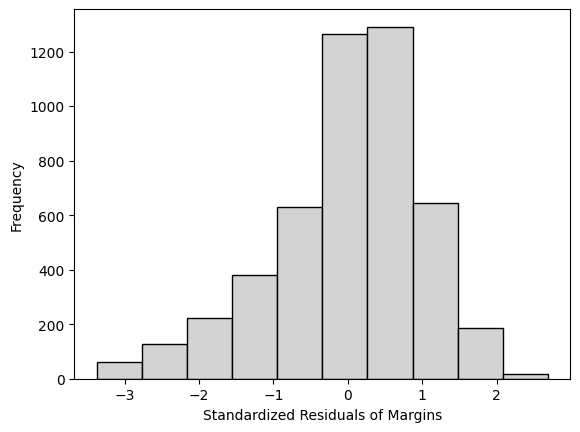

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

3.147856815344811e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -41.8393
p-value: 0.0000


## ‰∏âÂÄã‰∫§‰∫í‰ΩúÁî®È†Ö
ÈÄôË£°ÊàëÂÄëÂª∫Á´ã‰∫Ü‰∏âÂÄã‰∫§‰∫í‰ΩúÁî®È†ÖÔºö

- `danceability_tempo`ÔºöËàûËπàÊÄß √ó ÁØÄÂ•èÔºàdanceability √ó tempoÔºâÔºåÂèçÊò†Ê≠åÊõ≤ÁöÑËàûËπàÊÑüËàáÁØÄÂ•èÂø´ÊÖ¢ÁöÑÁ∂úÂêàÊïàÊûú„ÄÇ
- `danceability_energy`ÔºöËàûËπàÊÄß √ó ËÉΩÈáèÔºàdanceability √ó energyÔºâÔºåÁµêÂêàËàûËπàÊÑüËàáËÉΩÈáèÊÑüÔºåÊçïÊçâÂÖ©ËÄÖÂêåÊôÇÈ´òÊàñ‰ΩéÊôÇÁöÑÂΩ±Èüø„ÄÇ
- `energy_valence`ÔºöËÉΩÈáè √ó ÊÑâÊÇÖÂ∫¶Ôºàenergy √ó valenceÔºâÔºåÁî®‰æÜËßÄÂØüÈ´òËÉΩÈáè‰∏îÊÑâÊÇÖÁöÑÊ≠åÊõ≤ÊòØÂê¶ÁâπÂà•ÂèóÊ≠°Ëøé„ÄÇ

ÈÄô‰∫õ‰∫§‰∫í‰ΩúÁî®È†ÖÊúâÂä©ÊñºÊ®°ÂûãÊçïÊçâËÆäÊï∏ÈñìÈùûÁ∑öÊÄßÁöÑËÅØÂêàÊïàÊûúÔºåÊèêÂçáÈ†êÊ∏¨ËÉΩÂäõ„ÄÇ

In [ ]:
# ÂÖàÂª∫Á´ã‰∫§‰∫í‰ΩúÁî®È†Ö
data_interact = data.copy()
# 1. danceability √ó tempo
data_interact['danceability_tempo'] = data_interact['danceability'] * data_interact['tempo']
# 2. danceability √ó energy
data_interact['danceability_energy'] = data_interact['danceability'] * data_interact['energy']
# 3. energy √ó valence
data_interact['energy_valence'] = data_interact['energy'] * data_interact['valence']

# Ê∫ñÂÇô response
response = 'track_popularity'

# Â∞áÊâÄÊúâ predictorÔºàÂéüÊú¨ÁöÑ + ‰∫§‰∫í‰ΩúÁî®È†ÖÔºâÁµÑÂêà
predictors_interact = [col for col in data_interact.columns if col != response]

# Âü∑Ë°å backward selection
result_interact = backward_selection(data_interact[predictors_interact + [response]], response=response)
print(result_interact.summary())

liveness is removed with p-value 0.9624.

genre_soul is removed with p-value 0.8417.

genre_mandopop is removed with p-value 0.7422.

genre_ambient is removed with p-value 0.7773.

genre_lofi is removed with p-value 0.6791.

duration_ms is removed with p-value 0.6026.

mode is removed with p-value 0.4990.

genre_latin is removed with p-value 0.4078.

genre_reggae is removed with p-value 0.3707.

genre_country is removed with p-value 0.3557.

danceability_tempo is removed with p-value 0.3267.

acousticness is removed with p-value 0.2532.

energy_valence is removed with p-value 0.2474.

genre_jazz is removed with p-value 0.1813.

tempo is removed with p-value 0.1311.

genre_arabic is removed with p-value 0.0586.

genre_turkish is removed with p-value 0.0854.

genre_gospel is removed with p-value 0.0682.

valence is removed with p-value 0.0683.

danceability is removed with p-value 0.0540.

No variable is removed. Stop.
                            OLS Regression Results                   

Text(0, 0.5, 'Standardized Residuals of track popularity')

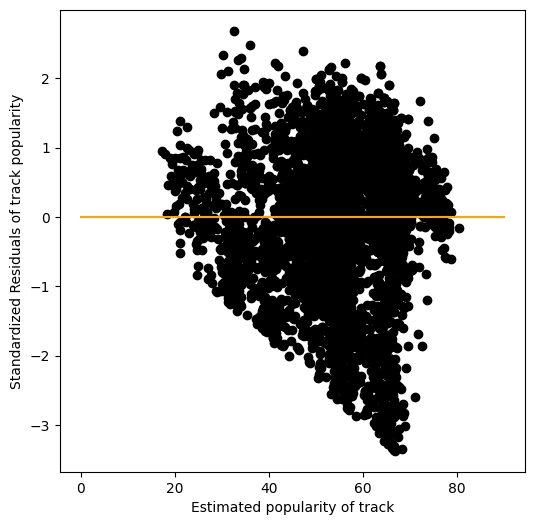

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

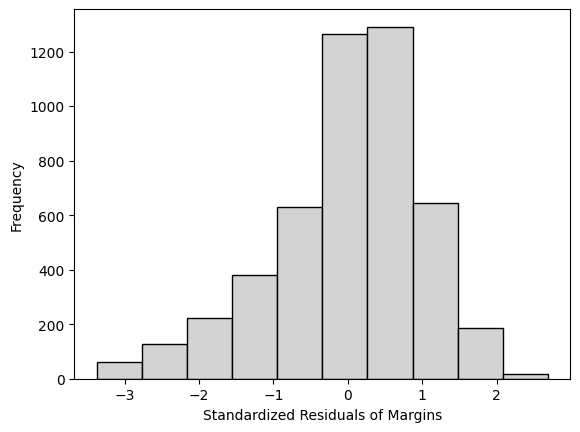

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

3.147856815344811e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -41.8393
p-value: 0.0000


## Backwards Stepwise Regression
### ÊáâËÆäÊï∏ÁÇ∫ $ \log(\text{track\_popularity}) $

In [ ]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy

# Â∞á track_popularity Âèñ logÔºàÂä† 1 Èò≤Ê≠¢ log(0)Ôºâ
df['track_popularity'] = np.log(df['track_popularity'])
predictors = [col for col in df.columns if col not in exclude_cols]


data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

# print(data.shape)
# display(data['genre_ambient'].value_counts())
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

genre_turkish is removed with p-value 0.9867.

genre_arabic is removed with p-value 0.9603.

liveness is removed with p-value 0.9158.

genre_gospel is removed with p-value 0.8633.

genre_country is removed with p-value 0.7872.

genre_latin is removed with p-value 0.6493.

mode is removed with p-value 0.3659.

genre_jazz is removed with p-value 0.3472.

tempo is removed with p-value 0.2499.

genre_mandopop is removed with p-value 0.2417.

duration_ms is removed with p-value 0.2172.

valence is removed with p-value 0.2273.

genre_soul is removed with p-value 0.2176.

genre_reggae is removed with p-value 0.1490.

acousticness is removed with p-value 0.1035.

energy is removed with p-value 0.1085.

genre_ambient is removed with p-value 0.0940.

speechiness is removed with p-value 0.0787.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.259
Model:          

Text(0, 0.5, 'Residuals of log(track popularity)')

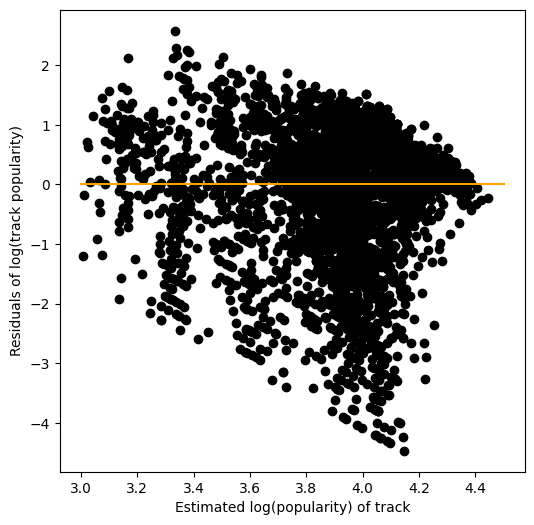

In [ ]:
influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([3, 4.5], [0, 0], color = 'orange')
plt.xlabel('Estimated log(popularity) of track')
plt.ylabel('Residuals of log(track popularity)')


Text(0, 0.5, 'Frequency')

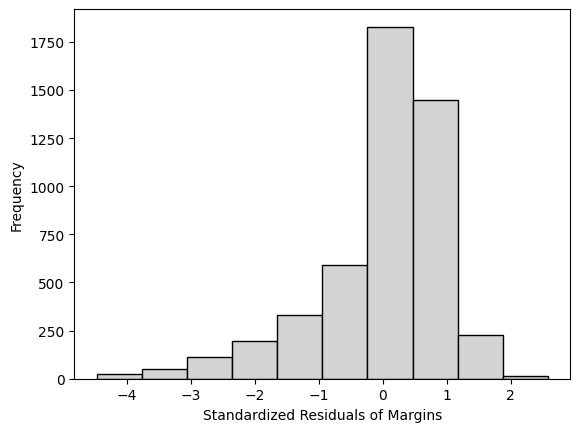

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

2.6682311789197867e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.8934
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -39.0126
p-value: 0.0000


## Genre Pop ols


In [ ]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'pop' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô

exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# Ëá™ÂãïÁî¢ÁîüÂÖ¨Âºè
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# Âª∫Ê®°
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# È°ØÁ§∫ÁµêÊûú
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     7.327
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.86e-12
Time:                        01:23:37   Log-Likelihood:                -2342.7
No. Observations:                 515   AIC:                             4711.
Df Residuals:                     502   BIC:                             4767.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           23.7547     14.016  

Text(0, 0.5, 'Standardized Residuals of track popularity')

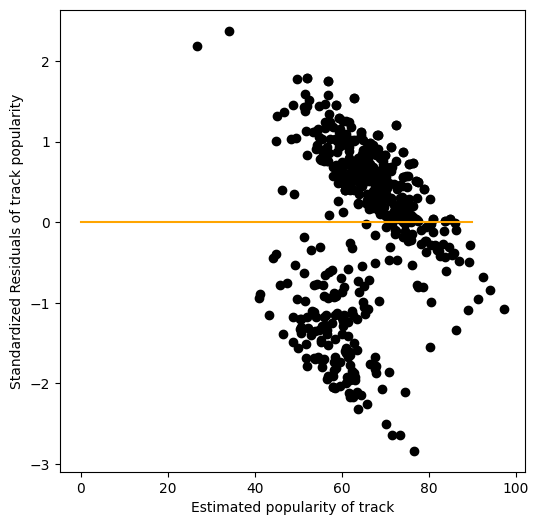

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

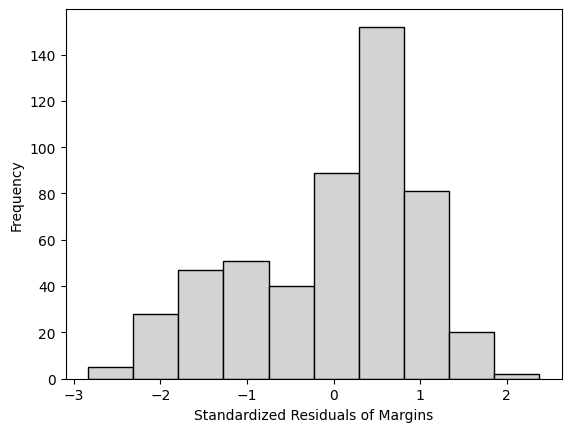

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

0.0006916619996732638

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9434
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -14.7655
p-value: 0.0000


## Backwards Stepwise Regression
### Genre Pop

In [ ]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'pop' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô


# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],

], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

liveness is removed with p-value 0.9074.

danceability is removed with p-value 0.8329.

tempo is removed with p-value 0.6245.

mode is removed with p-value 0.5666.

speechiness is removed with p-value 0.5220.

energy is removed with p-value 0.1524.

instrumentalness is removed with p-value 0.2232.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     16.76
Date:                Wed, 28 May 2025   Prob (F-statistic):           2.44e-15
Time:                        01:23:37   Log-Likelihood:                -2345.0
No. Observations:                 515   AIC:                             4702.
Df Residuals:                     509   BIC:                             4728.
Df Model:                           5 

Text(0, 0.5, 'Standardized Residuals of track popularity')

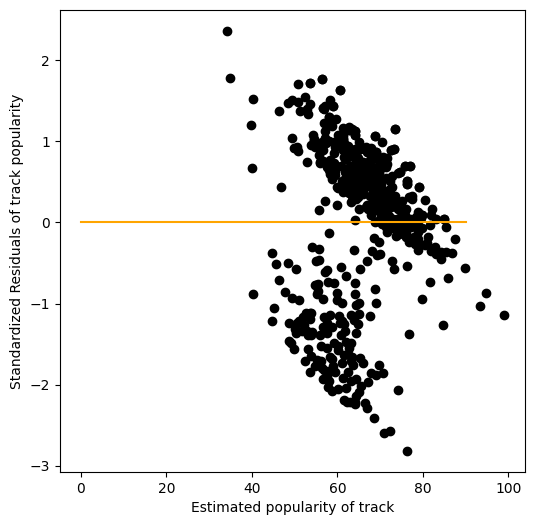

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

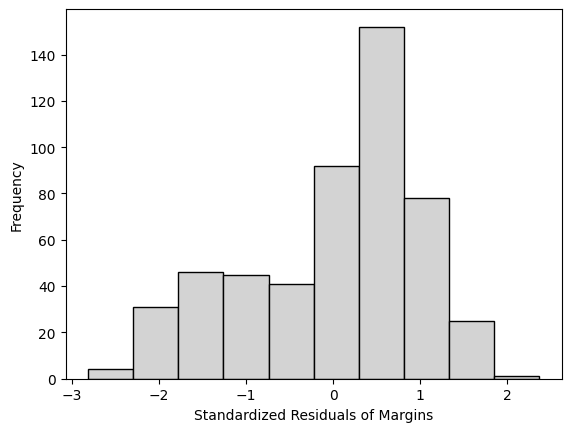

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

0.000474908705546643

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9397
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -14.7497
p-value: 0.0000


## Genre ÁöÑÊõ≤Êï∏ > 100 ÂÅö ols

In [ ]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
# ÁØ©ÈÅ∏ playlist_genre Êï∏ÈáèÂ§ßÊñº 30 ÁöÑË≥áÊñô
genre_counts = df['playlist_genre'].value_counts()
df = df[df['playlist_genre'].isin(genre_counts[genre_counts > 100].index)]


print(df['playlist_genre'].value_counts())
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True)

exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors], genre_dummies], axis=1)

# Ëá™ÂãïÁî¢ÁîüÂÖ¨Âºè
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# Âª∫Ê®°
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# È°ØÁ§∫ÁµêÊûú
print(result.summary())

playlist_genre
electronic    589
pop           515
latin         425
hiphop        395
ambient       359
rock          345
lofi          299
world         228
arabic        208
brazilian     148
jazz          146
gaming        133
classical     121
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     64.65
Date:                Wed, 28 May 2025   Prob (F-statistic):          1.31e-261
Time:                        01:23:38   Log-Likelihood:                -16681.
No. Observations:                3910   AIC:                         3.341e+04
Df Residuals:                    3885   BIC:                         3.357e+04
Df Model:                          24                                         
Covariance Typ

Text(0, 0.5, 'Standardized Residuals of track popularity')

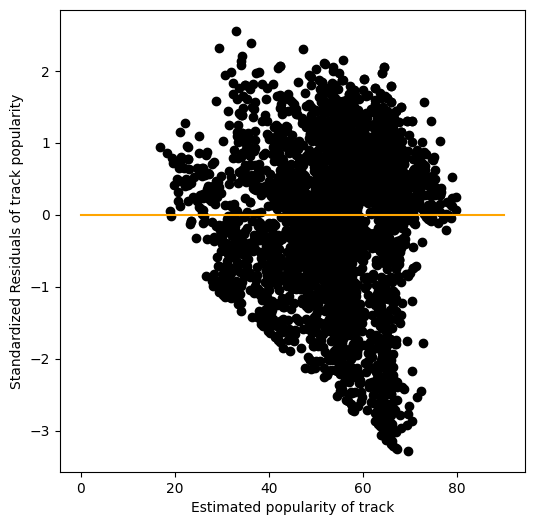

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

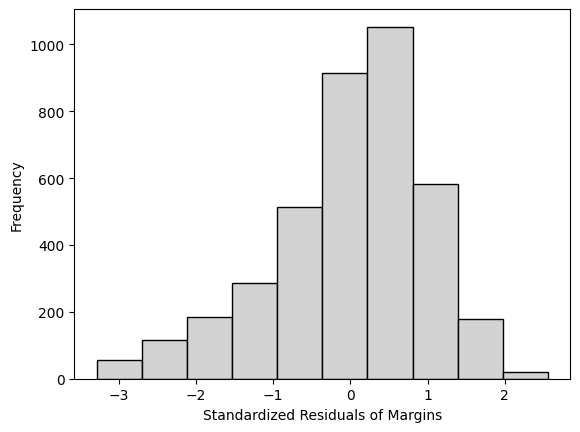

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

-2.4757540208839274e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9623
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -38.9829
p-value: 0.0000


## Backwards Stepwise Regression
### ÊáâËÆäÊï∏ÁÇ∫ $ \text{track\_popularity} $

#### Genre ÁöÑÊõ≤Êï∏ > 100

In [ ]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
# ÁØ©ÈÅ∏ playlist_genre Êï∏ÈáèÂ§ßÊñº 100 ÁöÑË≥áÊñô
genre_counts = df['playlist_genre'].value_counts()
df = df[df['playlist_genre'].isin(genre_counts[genre_counts > 100].index)]


print(df['playlist_genre'].value_counts())

genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
electronic    589
pop           515
latin         425
hiphop        395
ambient       359
rock          345
lofi          299
world         228
arabic        208
brazilian     148
jazz          146
gaming        133
classical     121
Name: count, dtype: int64
liveness is removed with p-value 0.8413.

genre_lofi is removed with p-value 0.8191.

mode is removed with p-value 0.6166.

genre_latin is removed with p-value 0.5988.

acousticness is removed with p-value 0.4259.

tempo is removed with p-value 0.2333.

energy is removed with p-value 0.1439.

genre_electronic is removed with p-value 0.2047.

loudness is removed with p-value 0.0840.

genre_jazz is removed with p-value 0.1002.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Leas

Text(0, 0.5, 'Standardized Residuals of track popularity')

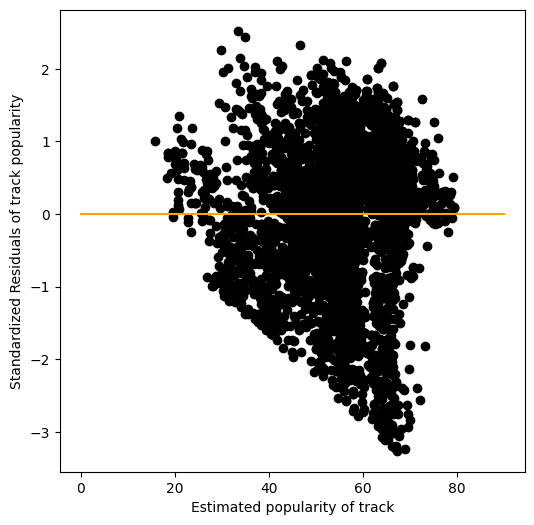

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

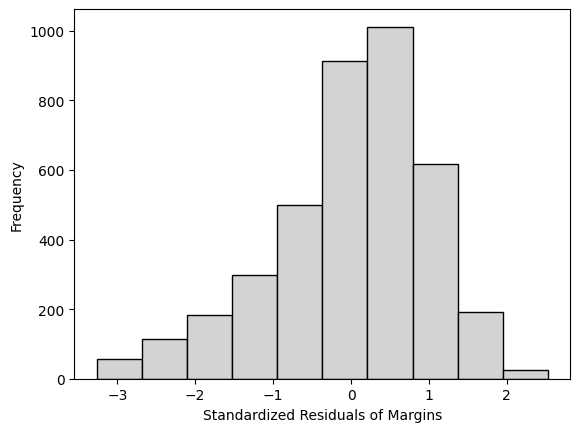

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

-3.323057807008232e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -38.4478
p-value: 0.0000


## Genre Gaming


In [ ]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'gaming' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô

print(df['playlist_genre'].value_counts())
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# Ëá™ÂãïÁî¢ÁîüÂÖ¨Âºè
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# Âª∫Ê®°
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# È°ØÁ§∫ÁµêÊûú
print(result.summary())

playlist_genre
gaming    133
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     20.61
Date:                Wed, 28 May 2025   Prob (F-statistic):           8.35e-24
Time:                        01:23:43   Log-Likelihood:                -502.42
No. Observations:                 133   AIC:                             1031.
Df Residuals:                     120   BIC:                             1068.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Text(0, 0.5, 'Standardized Residuals of track popularity')

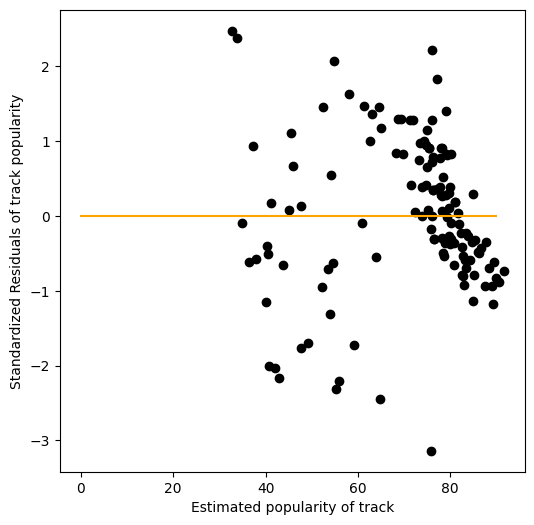

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

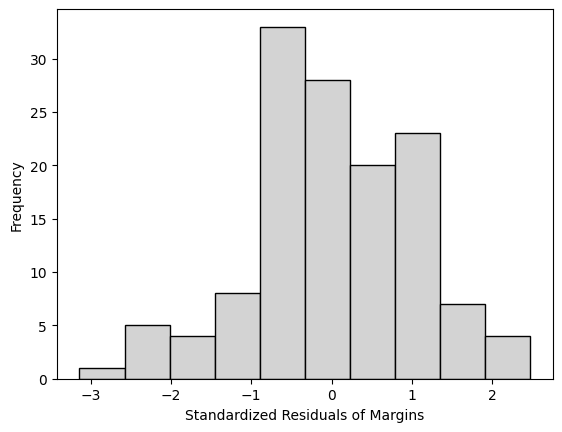

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

0.006573797435076452

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9852
p-value: 0.1590


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -3.5574
p-value: 0.0004


## Backwards Stepwise Regression
### Genre Gaming


In [ ]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'gaming' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô

print(df['playlist_genre'].value_counts())

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],

], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
gaming    133
Name: count, dtype: int64
duration_ms is removed with p-value 0.9617.

speechiness is removed with p-value 0.9348.

energy is removed with p-value 0.8690.

mode is removed with p-value 0.8230.

key is removed with p-value 0.4682.

liveness is removed with p-value 0.4174.

valence is removed with p-value 0.3164.

acousticness is removed with p-value 0.3163.

loudness is removed with p-value 0.4040.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     84.53
Date:                Wed, 28 May 2025   Prob (F-statistic):           2.62e-30
Time:                        01:23:43   Log-Likelihood:                -504.53
No. Observations:                 133   AIC:                     

Text(0, 0.5, 'Standardized Residuals of track popularity')

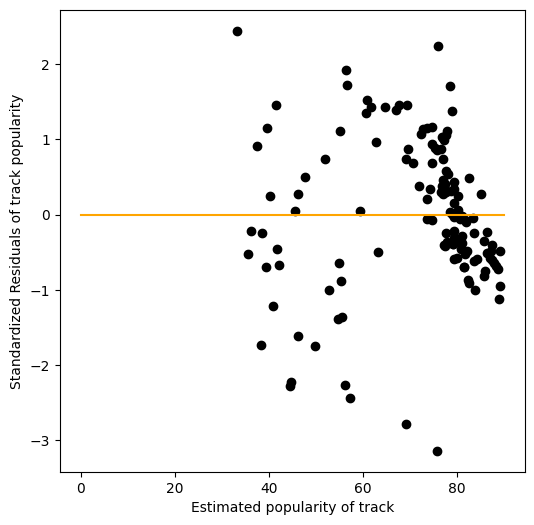

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

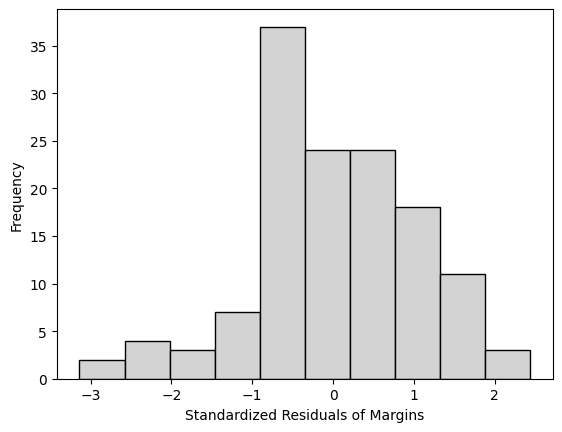

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

0.0016112702176818733

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9796
p-value: 0.0429


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -3.1974
p-value: 0.0014


### ROCK

In [ ]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'rock' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô

print(df['playlist_genre'].value_counts())
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# Ëá™ÂãïÁî¢ÁîüÂÖ¨Âºè
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# Âª∫Ê®°
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# È°ØÁ§∫ÁµêÊûú
print(result.summary())

playlist_genre
rock    345
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.661
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0741
Time:                        01:27:11   Log-Likelihood:                -1421.5
No. Observations:                 345   AIC:                             2869.
Df Residuals:                     332   BIC:                             2919.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### ÂæåÈù¢‰æÜ?

In [ ]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'rock' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô

print(df['playlist_genre'].value_counts())

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],

], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
rock    345
Name: count, dtype: int64
danceability is removed with p-value 0.7259.

duration_ms is removed with p-value 0.6218.

liveness is removed with p-value 0.4469.

instrumentalness is removed with p-value 0.3497.

speechiness is removed with p-value 0.3422.

acousticness is removed with p-value 0.2759.

tempo is removed with p-value 0.2225.

mode is removed with p-value 0.1342.

key is removed with p-value 0.1951.

energy is removed with p-value 0.1038.

loudness is removed with p-value 0.3696.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.113
Date:                Wed, 28 May 2025   Prob (F-statistic):            0.00802
Time:                        01:27:13   Log-Likeliho

### Hipop

In [ ]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'hiphop' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô

print(df['playlist_genre'].value_counts())
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# Ëá™ÂãïÁî¢ÁîüÂÖ¨Âºè
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# Âª∫Ê®°
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# È°ØÁ§∫ÁµêÊûú
print(result.summary())

playlist_genre
hiphop    395
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     8.349
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.70e-14
Time:                        01:27:15   Log-Likelihood:                -1646.1
No. Observations:                 395   AIC:                             3318.
Df Residuals:                     382   BIC:                             3370.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### backward hipop

In [ ]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'hiphop' ]  # ÂéªÈô§ track_popularity <= 0 ÁöÑË≥áÊñô

print(df['playlist_genre'].value_counts())

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],

], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
hiphop    395
Name: count, dtype: int64
mode is removed with p-value 0.9771.

tempo is removed with p-value 0.8882.

danceability is removed with p-value 0.7968.

acousticness is removed with p-value 0.4265.

liveness is removed with p-value 0.1807.

key is removed with p-value 0.0581.

valence is removed with p-value 0.0662.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     18.03
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.33e-16
Time:                        01:27:17   Log-Likelihood:                -1650.9
No. Observations:                 395   AIC:                             3314.
Df Residuals:                     389   BIC:                             

Text(0, 0.5, 'Standardized Residuals of track popularity')

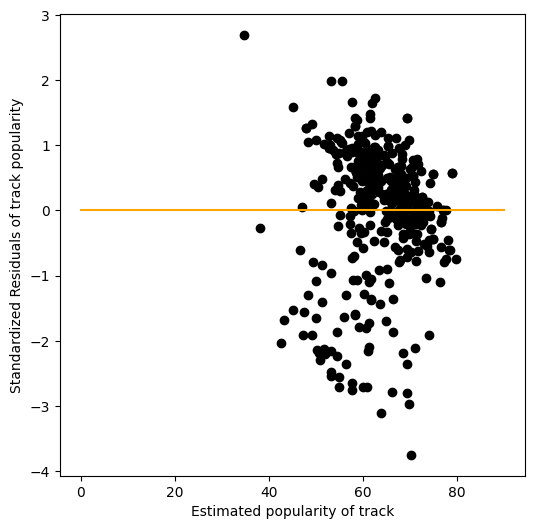

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

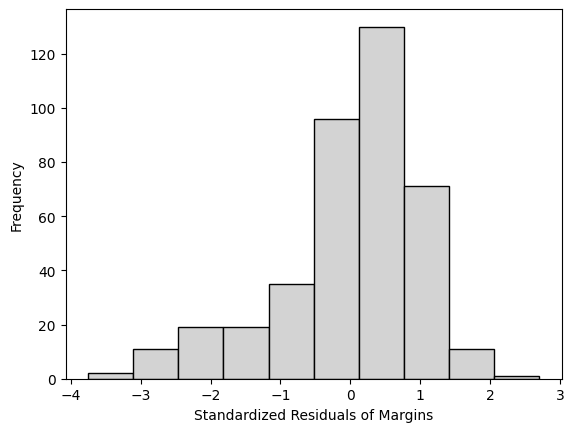

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')